# Simple orders analysis

🚀 The objective of this analysis is to get an initial understanding of:
- `orders` properties
- their associated `review_scores`

In [1]:
# Modules are imported
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# The _order_ training set is imported
from order import Order

In [7]:
orders = Order().get_training_data()

orders

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
0,e481f51cbdc54678b7cc49136f2d6af7,8.0,15.0,0.0,delivered,0,0,4,1,1,29.99,8.72,18.063837
1,53cdb2fc8bc7dce0b6741e2150273451,13.0,19.0,0.0,delivered,0,0,4,1,1,118.70,22.76,856.292580
2,47770eb9100c2d0c44946d9cf07ec65d,9.0,26.0,0.0,delivered,1,0,5,1,1,159.90,19.22,514.130333
3,949d5b44dbf5de918fe9c16f97b45f8a,13.0,26.0,0.0,delivered,1,0,5,1,1,45.00,27.20,1822.800366
4,ad21c59c0840e6cb83a9ceb5573f8159,2.0,12.0,0.0,delivered,1,0,5,1,1,19.90,8.72,30.174037
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95875,9c5dedf39a927c1b2549525ed64a053c,8.0,18.0,0.0,delivered,1,0,5,1,1,72.00,13.08,69.481037
95876,63943bddc261676b46f01ca7ac2f7bd8,22.0,23.0,0.0,delivered,0,0,4,1,1,174.90,20.10,474.098245
95877,83c1379a015df1e13d02aae0204711ab,24.0,30.0,0.0,delivered,1,0,5,1,1,205.99,65.02,968.051192
95878,11c177c8e97725db2631073c19f07b62,17.0,37.0,0.0,delivered,0,0,2,2,1,359.98,81.18,370.146853


In [8]:
# Shape is checked
orders.shape

(95872, 13)

## 1 - Features are inspected

👉 Summary statistics of each column of the order dataset are printed (`wait_time` is particularly focused on)

In [9]:
orders.describe()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
count,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000,95872.000000
mean,12.049055,23.375532,0.698692,0.592112,0.097651,4.155509,1.141783,1.013914,136.692876,22.749945,600.673668
std,9.460375,8.764119,4.556638,0.491445,0.296844,1.285113,0.535848,0.123635,207.672996,21.517061,594.818600
min,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.850000,0.000000,0.000000
25%,6.000000,18.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,45.900000,13.820000,187.199770
50%,10.000000,23.000000,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,85.990000,17.160000,433.943032
75%,15.000000,28.000000,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,149.900000,23.990000,797.505559
max,208.000000,155.000000,188.000000,1.000000,1.000000,5.000000,21.000000,5.000000,13440.000000,1794.960000,8736.947618


In [10]:
orders[["wait_time"]].describe()

,wait_time
count,95872.000000
mean,12.049055
std,9.460375
min,0.000000
25%,6.000000
50%,10.000000
75%,15.000000
max,208.000000


📈 Histograms are plotted to get a sense of the distribution of each numerical feature.

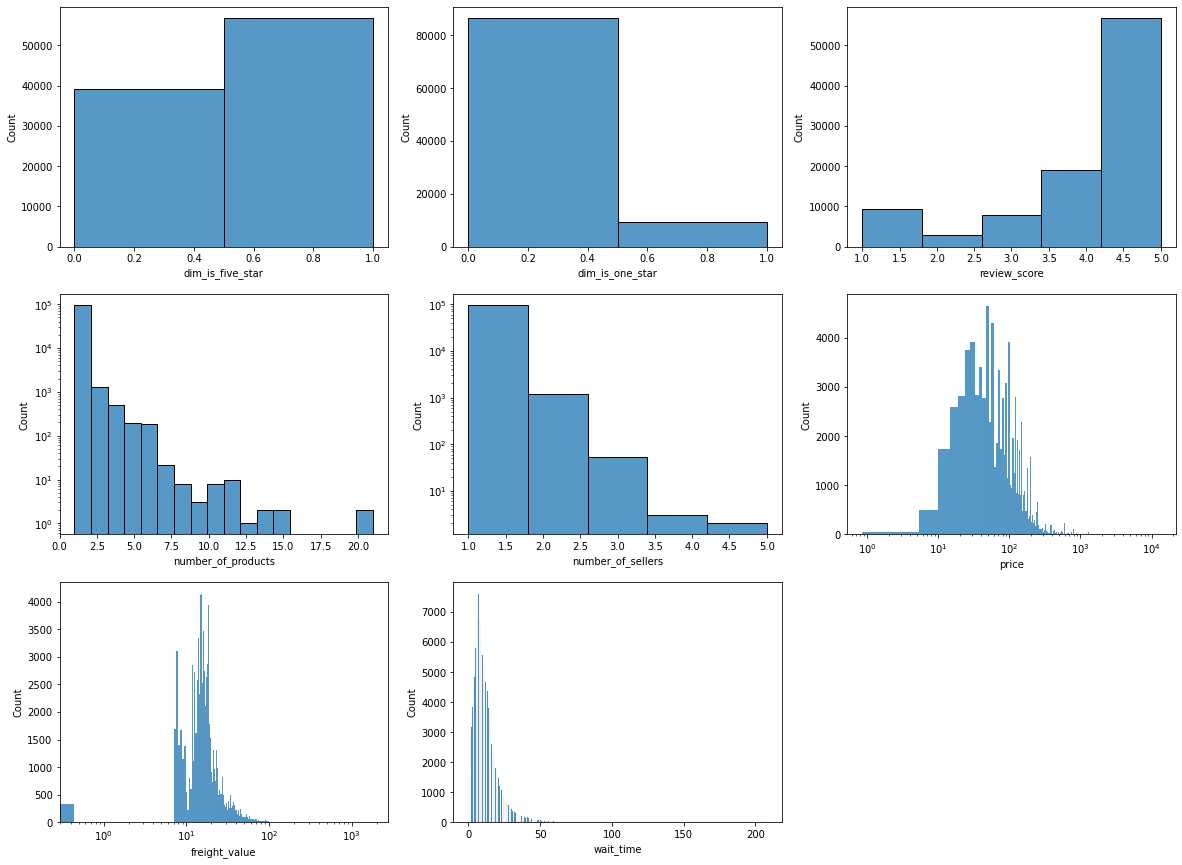

In [16]:
plt.figure(figsize = (20, 15))

plt.subplot(3,3,1)
a = sns.histplot(orders["dim_is_five_star"], bins = 2)

plt.subplot(3,3,2)
b = sns.histplot(orders["dim_is_one_star"], bins = 2)

plt.subplot(3,3,3)
c = sns.histplot(orders["review_score"], bins = 5)

plt.subplot(3,3,4)
d = sns.histplot(orders["number_of_products"])
d.set_yscale("log")

plt.subplot(3,3,5)
e = sns.histplot(orders["number_of_sellers"], bins = 5)
e.set_yscale("log")

plt.subplot(3,3,6)
f = sns.histplot(orders["price"])
f.set_xscale("log")

plt.subplot(3,3,7)
g = sns.histplot(orders["freight_value"])
g.set_xscale("log")

plt.subplot(3,3,8)
h = sns.histplot(orders["wait_time"])
g.set_xscale("log")

👀 An `sns.FacetGrid()` of histograms is created for each `review_score` vs. `wait_time`

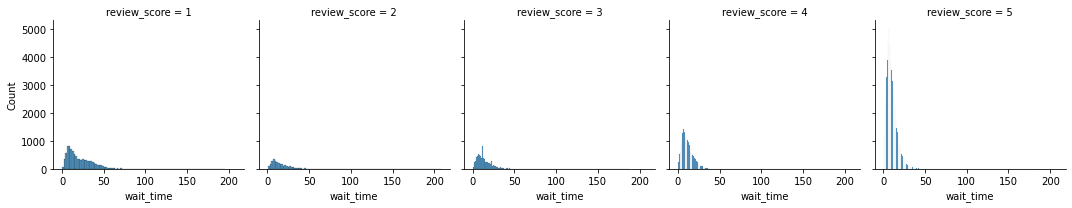

In [18]:
g = sns.FacetGrid(orders, col="review_score")
g.map_dataframe(sns.histplot, x="wait_time");

❓ The  `distance_seller_customer` feature from `order.py` is investigated.

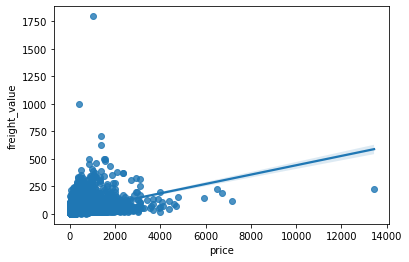

In [20]:
sns.regplot(x = "price", y = "freight_value", data = orders);

❓The various correlations between features are inspected: which feature seems to the most correlated with `review_score`?

<details>
    <summary>▸ Details</summary>

* `DataFrame.corr()` is used combined with `sns.heatmap()` and `cmap='coolwarm'`
* The absolute values of the correlation coefficients of `review_score` vs. each feature is looked into,
    * the higher the coefficient, the more one given feature is correlated (positively or negatively) with the `review_score`

</details>

In [21]:
orders.corr()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
wait_time,1.000000,0.384890,0.693622,-0.233980,0.305500,-0.333895,-0.019835,-0.040803,0.055527,0.167221,0.394709
expected_wait_time,0.384890,1.000000,0.008143,-0.050328,0.034622,-0.052413,0.015497,0.024779,0.076746,0.238833,0.513680
delay_vs_expected,0.693622,0.008143,1.000000,-0.151041,0.276087,-0.263319,-0.013274,-0.016424,0.016497,0.023471,0.064709
dim_is_five_star,-0.233980,-0.050328,-0.151041,1.000000,-0.396354,0.791749,-0.072270,-0.070536,-0.012762,-0.058773,-0.056559
dim_is_one_star,0.305500,0.034622,0.276087,-0.396354,1.000000,-0.807758,0.119848,0.102241,0.044660,0.082778,0.043180
review_score,-0.333895,-0.052413,-0.263319,0.791749,-0.807758,1.000000,-0.123340,-0.117017,-0.034538,-0.090014,-0.059147
number_of_products,-0.019835,0.015497,-0.013274,-0.072270,0.119848,-0.123340,1.000000,0.288734,0.153551,0.438056,-0.017306
number_of_sellers,-0.040803,0.024779,-0.016424,-0.070536,0.102241,-0.117017,0.288734,1.000000,0.042986,0.133580,-0.007644
price,0.055527,0.076746,0.016497,-0.012762,0.044660,-0.034538,0.153551,0.042986,1.000000,0.410129,0.079348
freight_value,0.167221,0.238833,0.023471,-0.058773,0.082778,-0.090014,0.438056,0.133580,0.410129,1.000000,0.314188


* 😏 _Observations :_
    * `review_score` is 100% correlated to itself 
    * and strongly correlated to `dim_is_one_star` and `dim_is_five_star`...
* ⚠️ The two next highest correlation coefficients with respect to the `review_score` are :
    * `wait_time` : - 34 %
    * `delay_vs_expected` : 27 %

## 2 - Simple regression of `review_score` against delivery duration

👉 It seems that `review_score` is mostly correlated with `wait_time` (= - 34%) and `delay_vs_expected` (27%).

🎨 These correlations are investigated with `seaborn`

### 2.1 Plots
❓ In one figure, 2 subplots are created, that regress `review_score` on `wait_time` and `delay_vs_expected` respectively.

<u>Details</u>:

- The dataframe is reduced to a random sub-`sample of 10,000 rows` for speed purposes (a good practice in data exploration)
- `DataFrame.sample()` is used with a fixed `random_state` to avoid changing the sample at each execution if needed
- `sns.regplot()` is used to plot the `regression lines`
- Some `y_jitter` parameters are added to better visualize the scatterplot density
- `xlim` and `ylim` are set to hide outliers

In [22]:
sample = orders.sample(10000, random_state = 100)

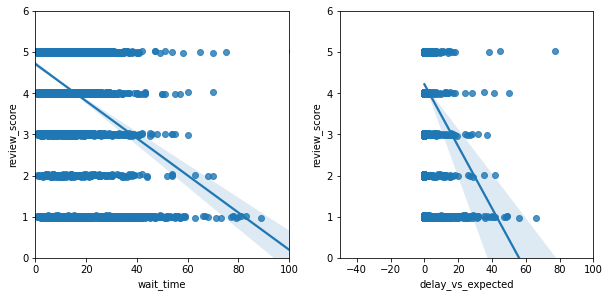

In [24]:
plt.figure(figsize = (10, 10))
plt.subplot(2,2,1)
a = sns.regplot(x = "wait_time", y = "review_score", data = sample, y_jitter = 0.03)
a.set(xlim = (0,100))
a.set(ylim = (0, 6))

plt.subplot(2,2,2)
b = sns.regplot(x = "delay_vs_expected", y = "review_score", data = sample, y_jitter = 0.03)
b.set(xlim = (-50, 100))
b.set(ylim = (0, 6));

ℹ️ `regplot` tried to perform a `Linear Regression` of the `review_score` vs. `wait_time` and `delay_vs_exp` <br/> *(Cf. Day 03 - Linear Regression tomorrow)*

🧐 It is not very interpretable, as we have only 5  different review scores which can be interpreted as a categorical variable with five different possible values (for example: "very bad", "bad", "average", "good" and "very good") that we are trying to regress against two continuous values that are `wait_time` and `delay_vs_exp`.

👀 However, based on the regression lines, we can see a very intuitive pattern: the longer the waiting time and/or the delay, the lower the review score -How fast does the review score decrease ?


### 2.2 Interpretation

❓ The `slope` of each curve are estimated visually. 

- `Slope wait_time ≈ -0.05` : "For each additional day waiting for an order to be delivered, the review score on average is reduced by 0.05"
- `Slope delay ≈ -0.1` : "For each additional day waiting for an order to be delivered _after the ETA_, the review score on average is reduced by 0.1"

❓ The delay seems more impactful than the waiting time.
    
👉Customer may be impatient to receive their orders and would like a small wait time, but they would be even more disappointed to receive their package after the expected delivery date!

### 2.3 Inferential analysis

Even if all 100,000 orders are used for these regplots, these orders only represent 16 months of data after all...

⚠️⚠️⚠️ **How certain** are we that these coefficients are **statistically significant**? ⚠️⚠️⚠️

⚡️ <u> Questions about the statistical significance of these coefficients: </u>

* Are these coefficients able to generalize well to future orders (all else being equal) ? (*Ideal answer: Yes*) 
* Are we sure that these coefficients do not simply capture random fluctuations due to the limited observation period ? (*Ideal answer: No*) 

🧐 The **`confidence interval`** around the mean value for these two slopes needs to be estimated :
$$slope_{wait} = -0.05 ± \ ?? \ \text{[95% interval]} $$
$$slope_{delay} = -0.1 ± \ ?? \ \text{[95% interval]} $$

⭐️ Fortunately, this 95% confidence interval is computed for us by `Seaborn` with a shaded blue cone around the regression line!

❓`Seaborn` `regplot` is used to visualize the two confidence intervals:
- The `size of sample dataset` is changed: 
    - The slope may change as the sample size becomes smaller. 
    - What about the confidence interval?
- The `size of the confidence interval` is changed by playing with the regplot parameter called `ci` (95% by default)

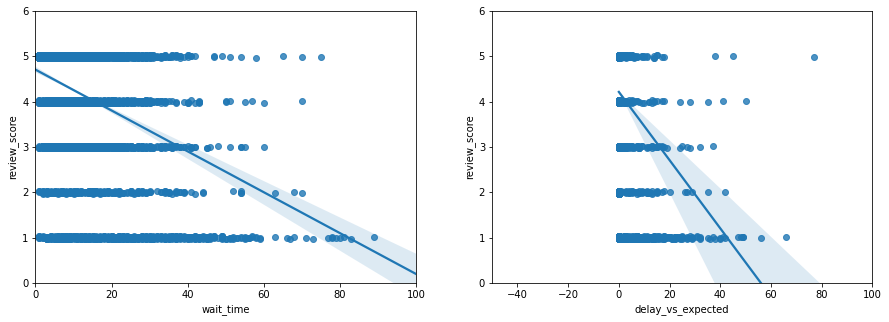

In [25]:
sample = orders.sample(10000, random_state = 100)

plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
a = sns.regplot(x = "wait_time", y = "review_score", data = sample, y_jitter = 0.03, ci = 95)
a.set(xlim = (0,100))
a.set(ylim = (0, 6))

plt.subplot(1,2,2)
b = sns.regplot(x = "delay_vs_expected", y = "review_score", data = sample, y_jitter = 0.03, ci = 95)
b.set(xlim = (-50, 100))
b.set(ylim = (0, 6));

🔎 Interpretation:

* **Null Hypothesis** $H_0$ : "this variable does not influence the review score", a.k.a its coefficient is equal to zero

When plotting all datapoints:
- The 95% confidence interval for the slope does not contain the value 0.
    - 👉 We are `95% confident that slower deliveries are associated with weaker reviews`.
- The **`p-value`** associated with the null hypothesis "the delivery time is almost zero" is lower than 5%
    - 👉 We can safely reject this null hypothesis and consider the **`alternative hypothesis`** = `"the delivery time has an impact on the review score"` 

🔥 Our findings are said to be **statistically significant**. 

⚠️ However, **correlation does NOT imply causality**. 

- It can be inherently slower to deliver certain products (e.g.heavy products)
    - These categories of products will often have a low review_score, not matter how long their delivery time is. 

👉 Identifying **confounding factor** is crucial and cannot be done with a simple univariate regression. 
